# Observations or Inferences
1.
2.
3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouseID = len(combinedData["Mouse ID"].unique())
mouseID

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = combinedData.loc[combinedData.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicateMouse

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = combinedData[combinedData["Mouse ID"] == "g989"]
duplicateMouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = combinedData[combinedData["Mouse ID"].isin(duplicateMouse)==False]
cleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
cleanMice = len(cleanData["Mouse ID"].unique())
cleanMice

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = cleanData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = cleanData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = cleanData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sds = cleanData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = cleanData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


summaryTable = pd.DataFrame ({
    
    "Mean Antibody Level" : means,
    "Median Antibody Level" : medians,
    "Variance of Antibody Level" : variances,
    "Standard Deviation of Antibody Level" : sds,
    "Standard Error of Antibody Level" : sems,
})

summaryTable

,Mean Antibody Level,Median Antibody Level,Variance of Antibody Level,Standard Deviation of Antibody Level,Standard Error of Antibody Level
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

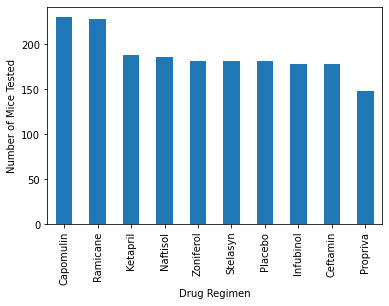

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = cleanData["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

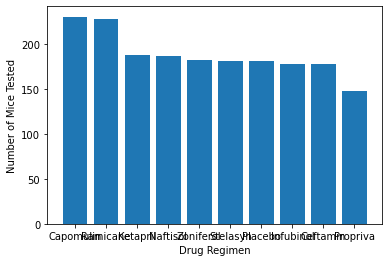

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index.values, counts.values)
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

In [24]:
counts = cleanData["Sex"].value_counts()
counts

Male      958
Female    922
Name: Sex, dtype: int64

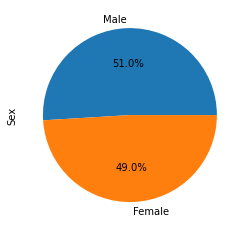

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

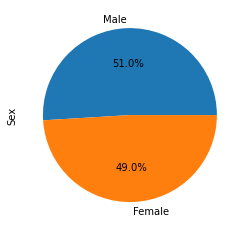

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels= counts.index.values, autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

lastTimepoint = cleanData.groupby(["Mouse ID"])["Timepoint"].max()
lastTimepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data = pd.merge(lastTimepoint, cleanData, how="inner", on=["Mouse ID", "Timepoint"])
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lastTimepoint = merged_data.loc[merged_data["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(lastTimepoint)
    
    # Determine outliers using upper and lower bounds
    quartiles = lastTimepoint.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = lastTimepoint.loc[(lastTimepoint < lower_bound) | (lastTimepoint > upper_bound)]
    
    
    print(f"{drug}'s potential outliers:\n {outliers}\n")

Capomulin's potential outliers:
 Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
 Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
 Series([], Name: Tumor Volume (mm3), dtype: float64)



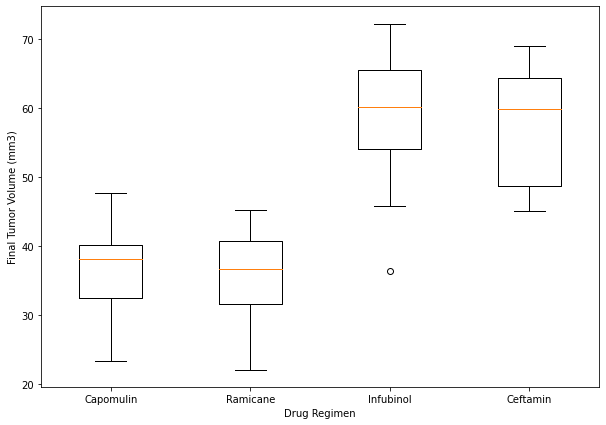

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [40]:
# Mice treated with Capomulin
mouseTreated = cleanData.loc[cleanData["Drug Regimen"]== "Capomulin"]
mouseTreated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


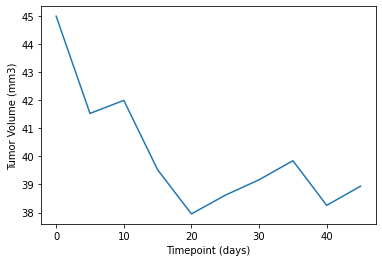

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treatedData = mouseTreated.loc[mouseTreated["Mouse ID"]== "b742"]
plt.plot(treatedData["Timepoint"], treatedData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

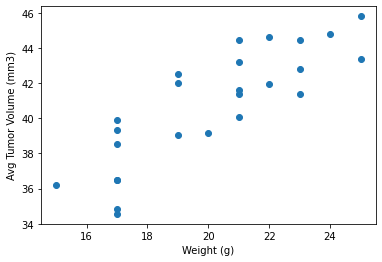

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
treatedAverage = cleanData.loc[cleanData["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(treatedAverage["Weight (g)"],treatedAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

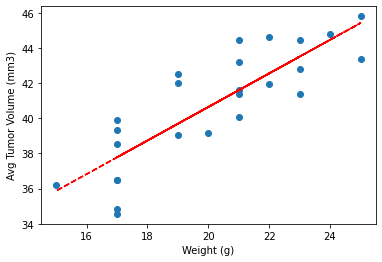

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = treatedAverage["Weight (g)"]
y_values = treatedAverage["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
correlation = st.pearsonr(x_values,y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r--")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()